In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.spatial.distance import pdist, squareform

### DESCRIBE DATA AND VARIABLES

In [3]:
data=pd.read_csv("/Users/davidepiccoli/Desktop/data mining/ravdess_dm1_2223/ravdess_features.csv")

In [4]:
data.shape

(2452, 38)

In [5]:
data.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,...,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,...,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,...,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,...,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [6]:
data.dtypes

modality                object
vocal_channel           object
emotion                 object
emotional_intensity     object
statement               object
repetition              object
actor                  float64
sex                     object
channels                 int64
sample_width             int64
frame_rate               int64
frame_width              int64
length_ms                int64
frame_count            float64
intensity              float64
zero_crossings_sum       int64
mfcc_mean              float64
mfcc_std               float64
mfcc_min               float64
mfcc_max               float64
sc_mean                float64
sc_std                 float64
sc_min                 float64
sc_max                 float64
sc_kur                 float64
sc_skew                float64
stft_mean              float64
stft_std               float64
stft_min               float64
stft_max               float64
stft_kur               float64
stft_skew              float64
mean    

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

In [9]:
data.describe() #statistical info about numerical data

,actor,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,...,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,1326.000000,2452.000000,2452.0,2452.0,2452.000000,2452.000000,2452.000000,1636.000000,2452.000000,2452.000000,...,2452.000000,2452.0,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,12.582202,1.002447,2.0,48000.0,2.004894,4092.151305,193587.188010,-37.625332,12885.314029,-28.769180,...,0.002272,1.0,-1.247929,0.112889,1.393649e-08,0.020504,-0.164871,0.179839,11.203002,-0.048245
std,6.916240,0.049416,0.0,0.0,0.098833,598.321526,36825.369056,8.451982,3665.319584,4.461886,...,0.004830,0.0,0.211781,0.330759,4.267587e-05,0.021024,0.175443,0.195539,6.614859,0.454925
min,1.000000,1.000000,2.0,48000.0,2.000000,2936.000000,-1.000000,-63.864613,4721.000000,-43.812923,...,0.000000,1.0,-1.669603,-0.993957,-9.435575e-04,0.000652,-0.998810,0.004669,1.757794,-2.356526
25%,7.000000,1.000000,2.0,48000.0,2.000000,3604.000000,172972.000000,-43.539869,10362.500000,-31.828597,...,0.000000,1.0,-1.390612,-0.094334,-1.394488e-06,0.006791,-0.202431,0.055489,6.519988,-0.336624
50%,13.000000,1.000000,2.0,48000.0,2.000000,4004.000000,190591.000000,-37.072745,12383.500000,-28.681109,...,0.000190,1.0,-1.292105,0.126065,-9.810701e-08,0.013880,-0.103775,0.109726,9.828686,0.004256
75%,19.000000,1.000000,2.0,48000.0,2.000000,4538.000000,217817.000000,-31.591309,14966.000000,-25.550238,...,0.001999,1.0,-1.152519,0.335574,8.363511e-07,0.026154,-0.054352,0.224487,14.085435,0.262978
max,24.000000,2.000000,2.0,48000.0,4.000000,6373.000000,305906.000000,-16.353953,30153.000000,-15.491450,...,0.039378,1.0,0.794669,1.465815,1.222810e-03,0.152168,-0.006134,0.999146,59.085695,1.799676


### MISSING VALUES REPLACEMENT

MISSING VALUES FOR VOCAL_CHANNEL AND ACTOR WERE REPLACED THROUGH A METHOD BASED ON THE DISTRIBUTION OF THE TWO VARIABLES

<AxesSubplot:>

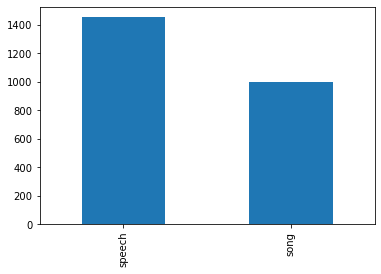

In [13]:
data["vocal_channel"].value_counts().plot(kind='bar')

In [14]:
s=data["vocal_channel"].value_counts("speech")
print(s)

speech    0.592985
song      0.407015
Name: vocal_channel, dtype: float64


In [15]:
#data["vocal_channel"]=data["vocal_channel"].fillna(data["vocal_channel"].value_counts("speech")[0])

missing = data['vocal_channel'].isnull()
data.loc[missing,'vocal_channel'] = np.random.choice(s.index, size=len(data[missing]),p=s.values)
print(data["vocal_channel"])

0       speech
1       speech
2       speech
3       speech
4         song
         ...  
2447    speech
2448    speech
2449      song
2450    speech
2451      song
Name: vocal_channel, Length: 2452, dtype: object


In [16]:
data["vocal_channel"].isnull().sum()

0

In [17]:
s=data["vocal_channel"].value_counts()
print(s)

speech    1454
song       998
Name: vocal_channel, dtype: int64


MISSING VALUES-ACTOR

<AxesSubplot:>

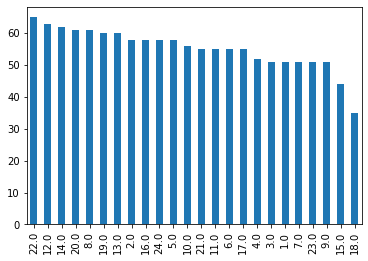

In [18]:
#histogram of actor
data["actor"].value_counts().plot(kind='bar')

In [19]:
q=data["actor"].value_counts("22")
#print(q)

In [20]:
missing_actor = data['actor'].isnull()
data.loc[missing_actor,'actor'] = np.random.choice(q.index, size=len(data[missing_actor]),p=q.values)
#print(data["actor"])

In [21]:
#histo of actor
#data["actor"].value_counts().plot(kind='bar')

MISSING VALUES- INTENSITY: HERE MISSING VALUES WERE INSTEAD REPLACE THROUGH AN INTERPOLATION BASED ON THE CORRELATION BETWEEN INTENSITY AND STD

Text(0, 0.5, 'std')

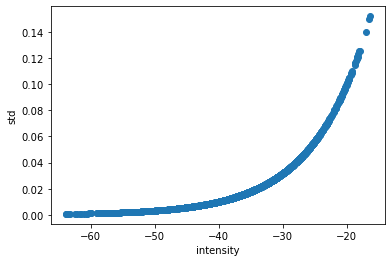

In [23]:
data.set_index('std', inplace=True)
data.interpolate(method='index', inplace=True)
data.reset_index(inplace=True)
plt.scatter(y=data["std"], x=data["intensity"])
plt.xlabel("intensity")
plt.ylabel("std")

In [26]:
y=data["intensity"].value_counts("-29.132889")
#print(y)

NOW LOOKING FOR POSSIBLE ERRORS IN THE DATASET

In [25]:
data["actor"].unique()

array([ 2., 16., 14., 20., 12., 13.,  7.,  6., 19.,  4., 22.,  8., 17.,
       24., 21., 11., 23.,  5., 18.,  1.,  3., 10.,  9., 15.])

In [26]:
data["intensity"].unique()

array([-36.79343187, -33.80965482, -32.29073734, ..., -29.51278762,
       -40.79065532, -36.2675536 ])

Text(0, 0.5, 'Frame count')

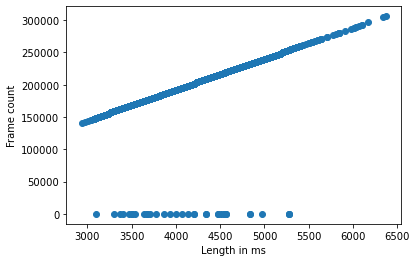

In [27]:
#scatter to see the correlation beetween frame count and lenght_ms, as expected is almost 1 but frame count has some missing values
plt.scatter(x=data["length_ms"], y=data["frame_count"])
plt.xlabel("Length in ms")
plt.ylabel("Frame count")

In [28]:
#which rows have an error on the attribute frame count 
data.loc[data['frame_count'] == -1]

,std,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,...,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,min,max,kur,skew
272,0.023109,audio-only,song,happy,normal,Dogs are sitting by the door,2nd,14.0,F,1,...,0.349896,0.000000,1.0,-0.942975,0.756251,-6.976550e-07,-0.145843,0.162659,6.614617,0.050854
300,0.016256,audio-only,speech,calm,normal,Dogs are sitting by the door,1st,22.0,F,1,...,0.316653,0.000322,1.0,-1.089289,0.374036,-7.148050e-07,-0.109406,0.087036,5.302984,-0.423892
455,0.002414,audio-only,speech,calm,strong,Kids are talking by the door,1st,1.0,M,1,...,0.263904,0.000000,1.0,-0.900937,-0.438346,4.404826e-07,-0.016510,0.022736,10.454706,0.538686
458,0.005289,audio-only,speech,calm,strong,Kids are talking by the door,1st,15.0,M,1,...,0.293819,0.015282,1.0,-1.159614,-0.285414,7.785121e-06,-0.066254,0.071503,23.811493,-0.858901
670,0.021265,audio-only,speech,sad,strong,Kids are talking by the door,1st,4.0,F,1,...,0.359253,0.000000,1.0,-1.380340,0.342158,-2.253620e-07,-0.174316,0.193268,8.562913,-0.023027
676,0.006063,audio-only,speech,happy,normal,Kids are talking by the door,1st,15.0,F,1,...,0.315858,0.000377,1.0,-1.226809,-0.220761,7.220722e-06,-0.045197,0.064484,12.625639,0.006728
692,0.010305,audio-only,speech,sad,strong,Dogs are sitting by the door,1st,24.0,F,1,...,0.331813,0.000000,1.0,-1.181188,0.418227,-2.129253e-07,-0.091553,0.121063,12.560777,0.170449
713,0.015966,audio-only,song,fearful,strong,Kids are talking by the door,1st,5.0,M,1,...,0.310660,0.004952,1.0,-1.196660,0.235288,-5.529279e-06,-0.138458,0.153381,14.530791,0.135448
836,0.007459,audio-only,song,neutral,normal,Kids are talking by the door,1st,21.0,M,1,...,0.339181,0.003542,1.0,-1.417016,0.109997,-2.816245e-06,-0.043488,0.047577,5.635349,0.092793
869,0.012115,audio-only,speech,happy,normal,Dogs are sitting by the door,1st,2.0,F,1,...,0.349477,0.000000,1.0,-1.342223,0.331307,2.369155e-07,-0.123383,0.144501,21.449223,0.607727


In [29]:
#we deleted the row where the frame counts is -1 becouse we think that it means that the recording had no information in it

In [30]:
data.drop(data[data['frame_count'] == -1].index, inplace = True)

In [31]:
data.loc[data['frame_count'] == -1]

,std,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,...,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,min,max,kur,skew


In [32]:
data.shape

(2417, 38)

In [33]:
#scatter plots for every column to detect any errors

In [34]:
num_data = data.loc[:, data.dtypes != object]

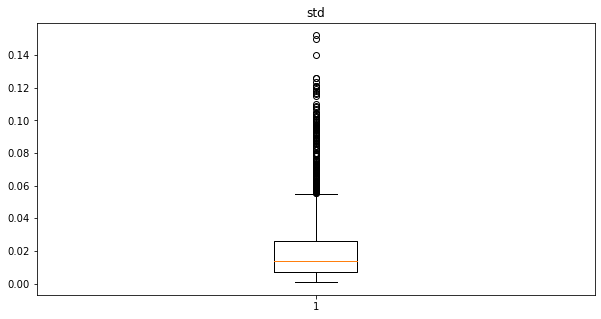

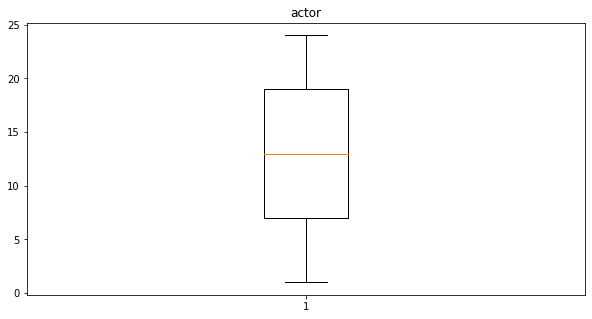

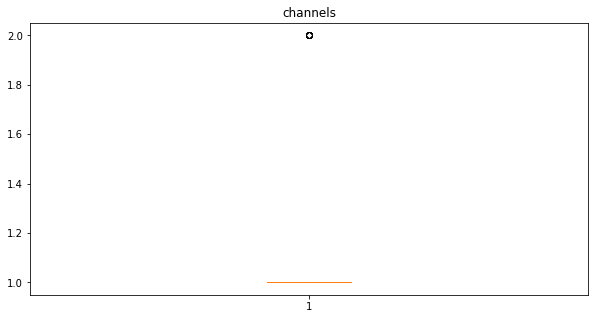

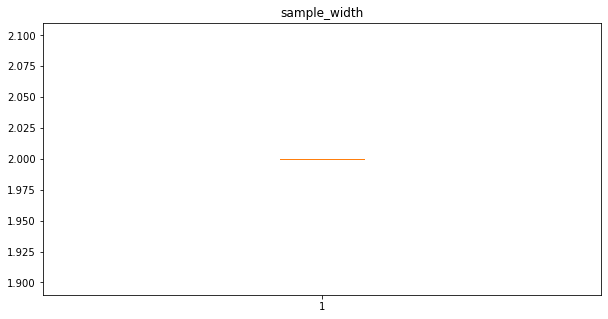

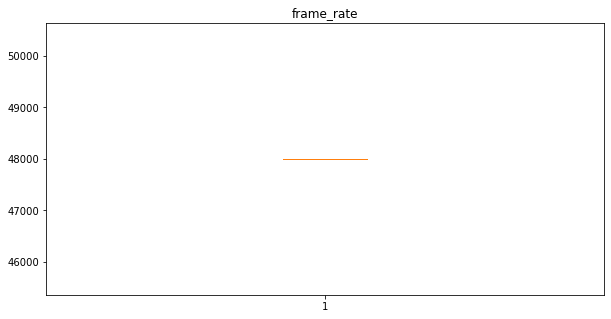

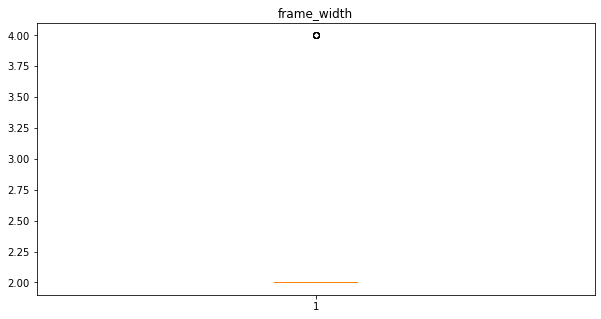

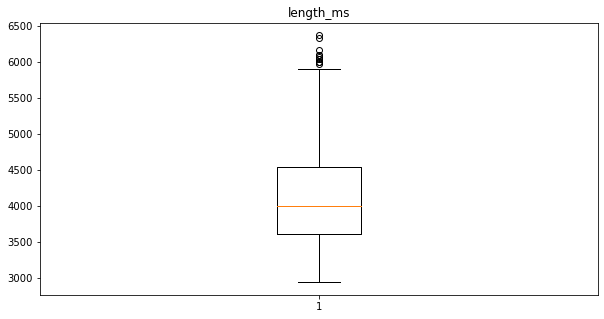

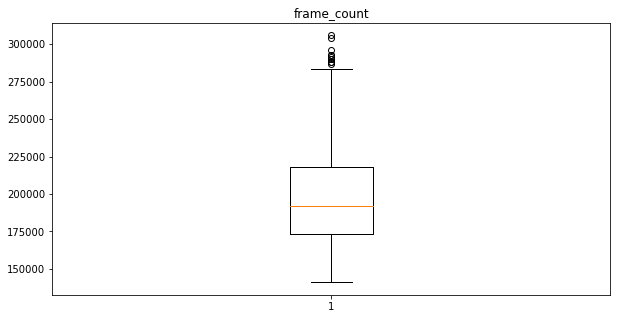

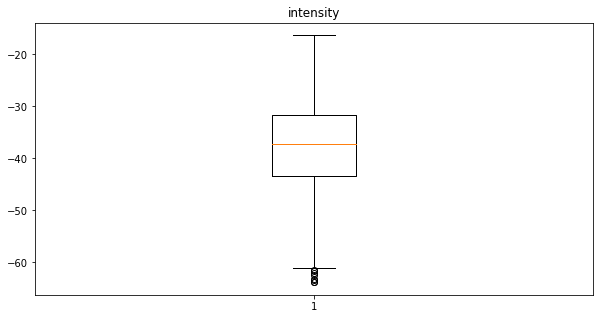

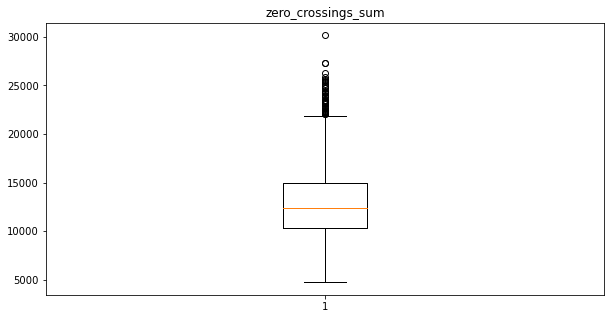

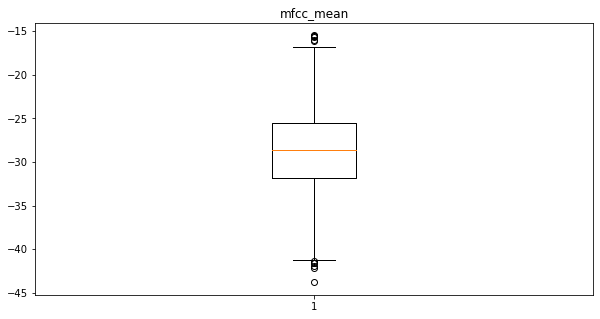

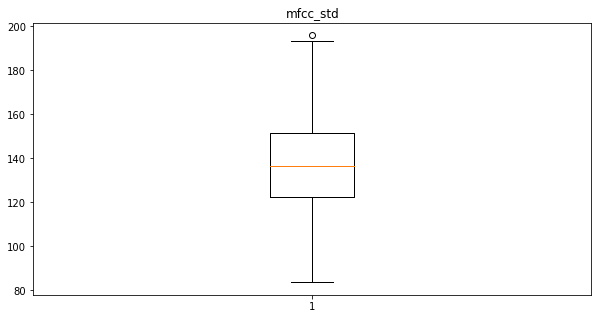

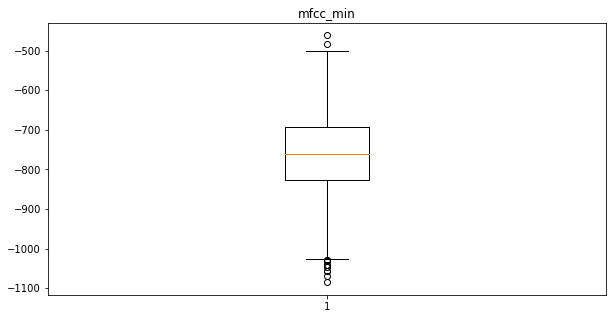

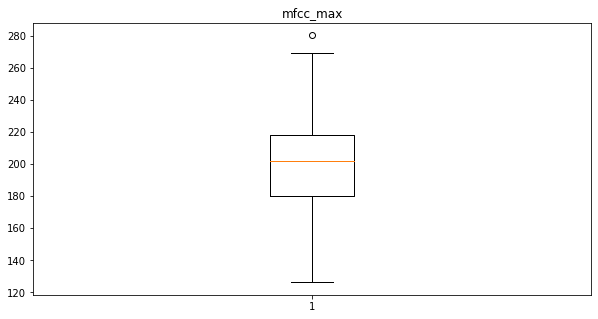

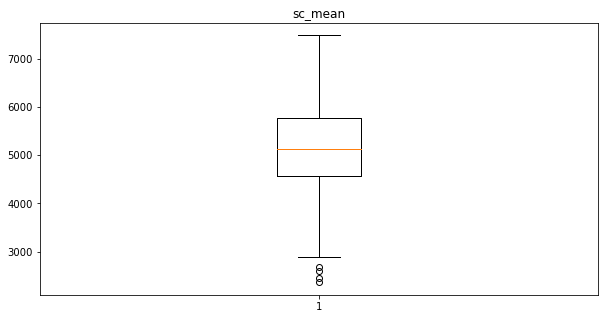

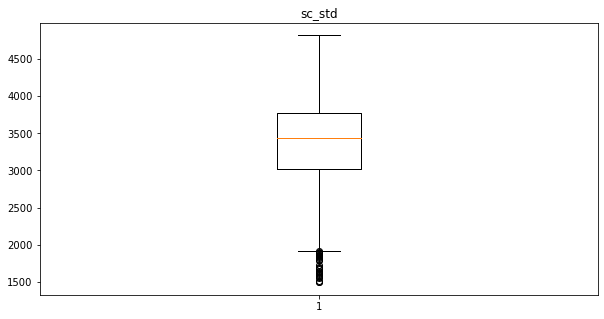

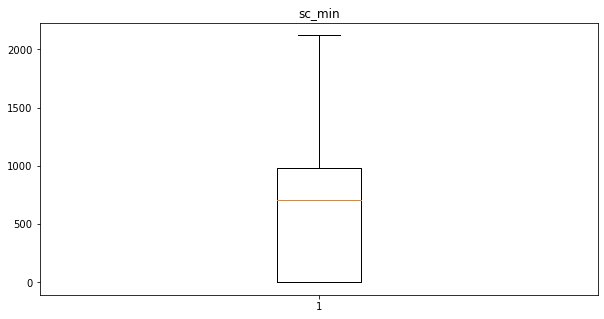

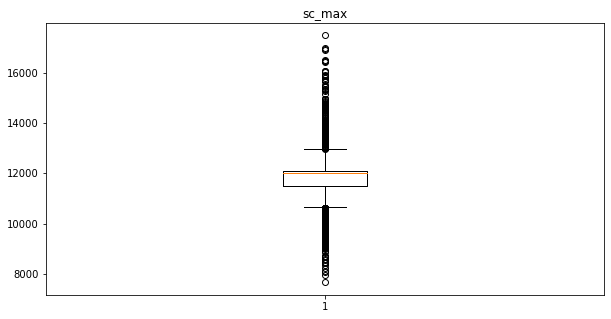

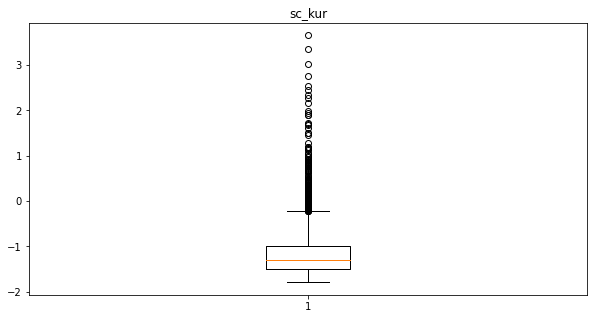

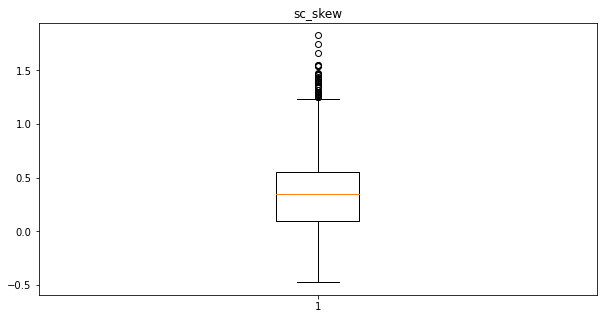

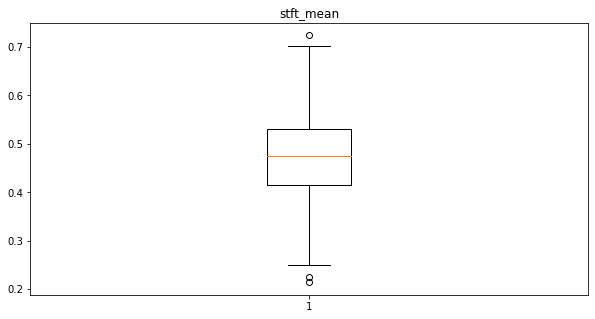

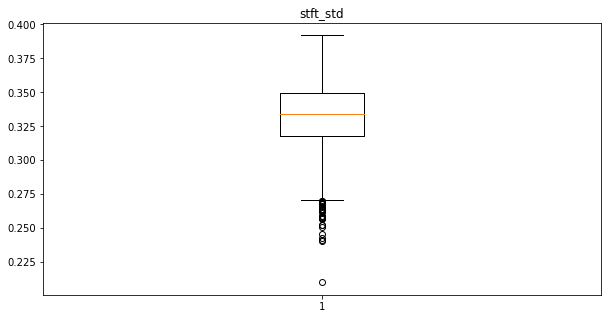

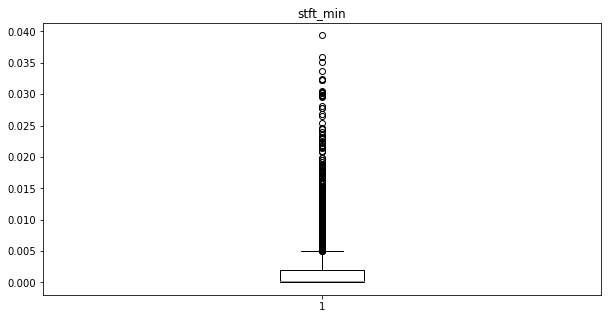

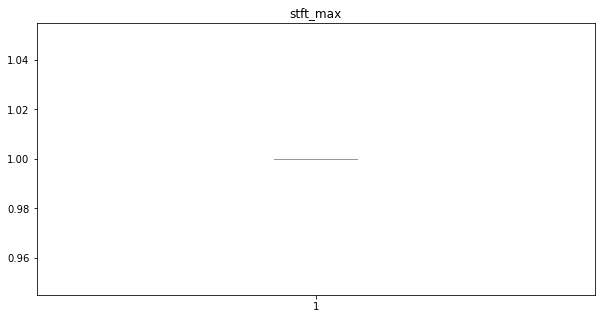

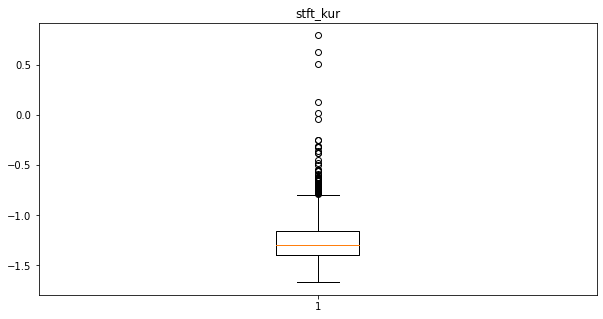

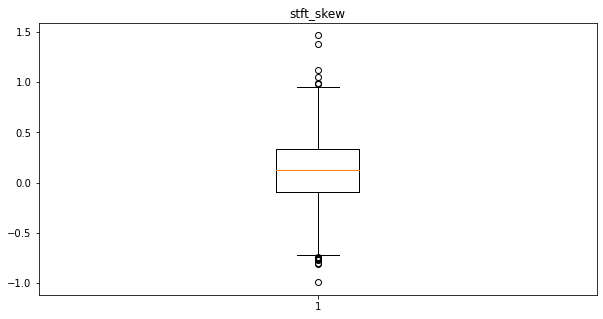

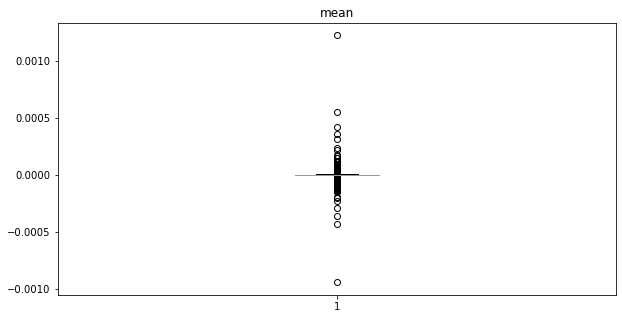

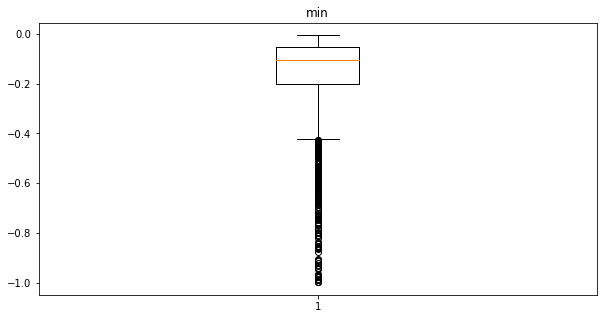

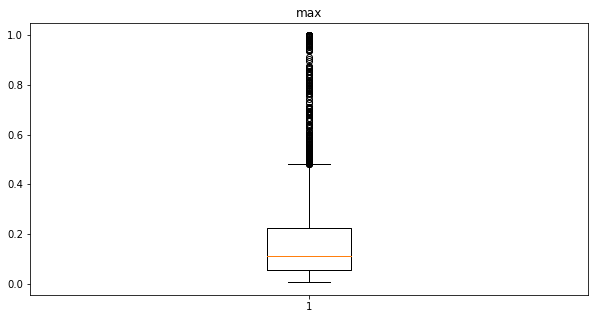

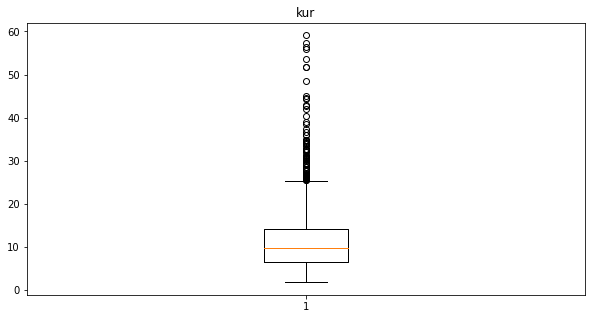

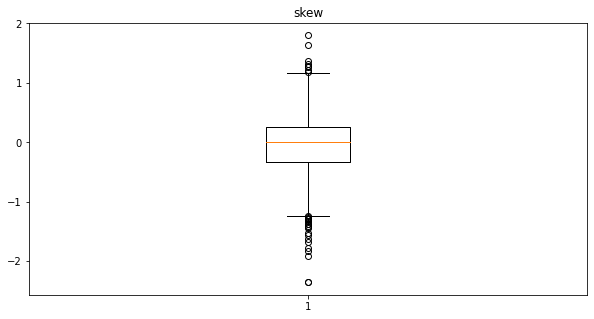

In [35]:
#box plots for every numerical attribute in order to see outliers easily
for i in num_data.columns:
    plt.figure(figsize=(10,5)) 
    plt.boxplot(num_data[i])
    plt.title(i).set_color("black")
    plt.show()

In [36]:
#check frame width==4 because it looks like all the rows have a value of 2 

In [37]:
data.loc[data['frame_width'] == 4]

,std,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,...,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,min,max,kur,skew
287,0.003710,audio-only,speech,fearful,normal,Kids are talking by the door,2nd,17.0,F,2,...,0.362575,0.000000,1.0,-1.494537,0.209463,-2.893082e-07,-0.027496,0.031311,12.807216,-0.357053
778,0.003085,audio-only,speech,calm,normal,Kids are talking by the door,2nd,1.0,M,2,...,0.271359,0.000000,1.0,-0.903370,-0.457552,8.110521e-07,-0.032349,0.028961,19.658056,0.763074
1045,0.006850,audio-only,speech,surprised,normal,Dogs are sitting by the door,2nd,1.0,M,2,...,0.308208,0.000000,1.0,-1.014021,-0.513559,8.506486e-07,-0.041962,0.067474,9.887096,0.756470
1336,0.010220,audio-only,song,neutral,normal,Kids are talking by the door,1st,24.0,F,2,...,0.354822,0.000000,1.0,-1.211296,0.526725,-6.876912e-07,-0.061523,0.066223,6.894591,-0.235057
1348,0.007949,audio-only,speech,happy,normal,Dogs are sitting by the door,1st,20.0,F,2,...,0.334683,0.000000,1.0,-1.380449,0.032001,-1.419925e-07,-0.069214,0.089722,18.307938,0.364011
1809,0.002960,audio-only,speech,calm,normal,Dogs are sitting by the door,2nd,5.0,M,2,...,0.311492,0.009151,1.0,-1.243703,-0.349210,1.850082e-06,-0.025269,0.029419,19.503409,-0.315966


All the lines of code below are histogram shown to check if some attributes have any errors/outliers (it could actually be done more efficiently through a for loop).

In [49]:
#data['vocal_channel'].value_counts().plot(kind='bar', title='Vocal channel distribution')
#plt.show()

In [50]:
#data['emotion'].value_counts().plot(kind='bar', 
#                                   title='Emotion distribution')
#plt.show()

In [51]:
#data['emotional_intensity'].value_counts().plot(kind='bar', title='EI distribution')
#plt.show()

In [52]:
#data['statement'].value_counts().plot(kind='bar', title='Statement distribution')
#plt.show()

In [53]:
#data['repetition'].value_counts().plot(kind='bar', title='Repetition distribution')
#plt.show()

In [54]:
#data['actor'].value_counts().plot(kind='bar', title='Actor distribution')
#plt.show()

In [55]:
#data['sex'].value_counts().plot(kind='bar', 
#                                   title='Sex distribution')
#plt.show()

In [56]:
#data['channels'].value_counts().plot(kind='bar', title='Channels distribution')
#plt.show()

In [57]:
#data['sample_width'].value_counts().plot(kind='bar', title='Sample width distribution')
#plt.show()

In [58]:
#data['frame_rate'].value_counts().plot(kind='bar', title='FR distribution')
#plt.show()

In [59]:
#data['frame_width'].value_counts().plot(kind='bar', title='FW distribution')
#plt.show()

From the data distribution of each attribute we can notice that each of the attributes "modality","sample_width","frame_rate" and "stft_max" has only one possible value, thus can be dropped. We may also notice how both "channels" and "frame_width" have only two possible values, and for one of them they both have only 6 counts. 
Furthermore, we can now see how channels and frame_width are heavily correlated, so we can drop one of the two columns.
Finally, it is possible to notice how the frame count and the lenght in ms are heavily correlated, so we decided to drop the frame count column due to the fact that we noticed some outliers that are not present in the lenght column.

In [60]:
data.drop(["modality","sample_width","frame_rate", "frame_count", "channels", "frame_width", "stft_max"], axis='columns', inplace=True)

# the variable "channels" was dropped too, as it contained the same value for each instance 

Scatterplots on every pair of continous parameters highlight a high correlation only between the variable "lenght" and the variable "frame count". For every other pair we can notice an aggregation in a specific point but not a specific correlation, but the high concentration in specific points can be better analyzed when defining clusters.

### CORRELATION MATRIX

In [61]:
########matrice di correlazione
num_data = data.loc[:, data.dtypes != object]

<AxesSubplot:>

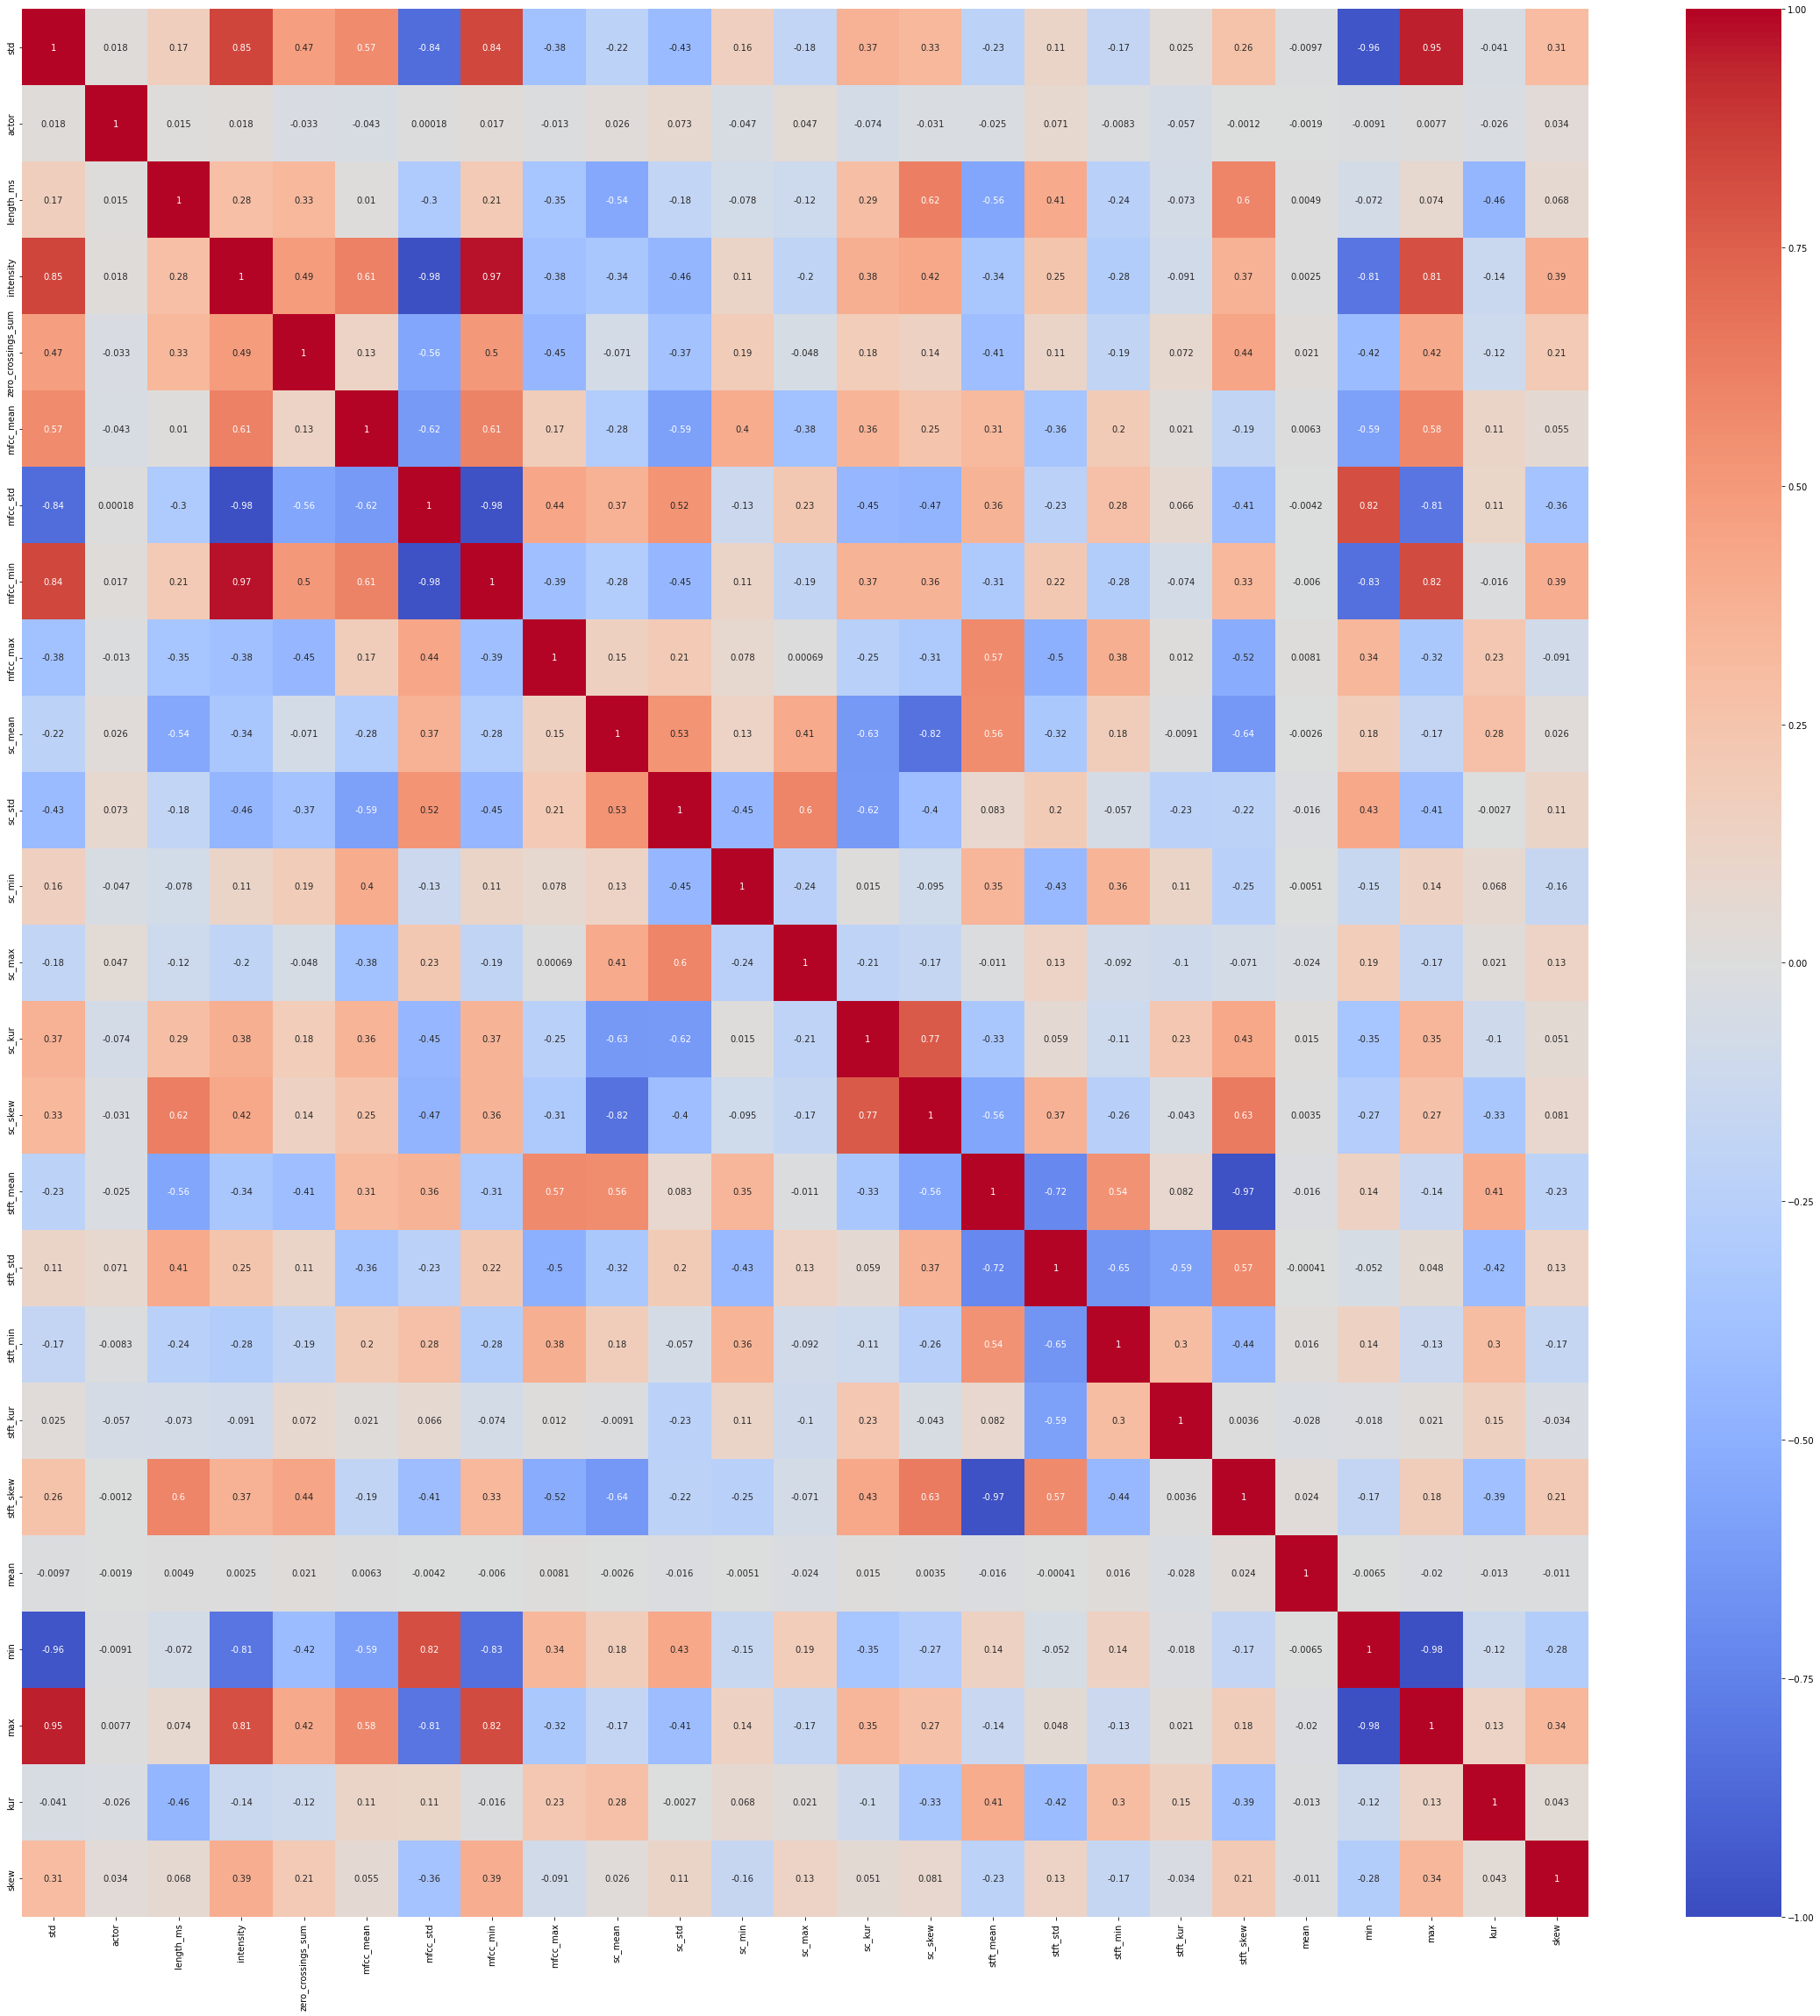

In [62]:
#for some reason stft_max is blank but we never did anything to it
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(num_data.corr(method='pearson'), cmap="coolwarm", vmin=-1, vmax=1, annot=True, )

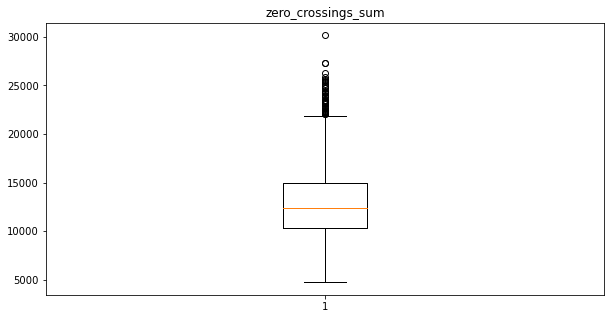

In [63]:
#checking the outlier that we noticed in the boxplot for zero crossing sum
#data.loc[data['zero_crossings_sum'] > 27500]


#data.drop(data[data['zero_crossings_sum'] == 30153].index, inplace = True)

plt.figure(figsize=(10,5)) 
plt.boxplot(data["zero_crossings_sum"])
plt.title("zero_crossings_sum").set_color("black")
plt.show()

# Some data manipulation was performed in the following cells, to check correlations between each categorical variable and every pair of statistical variables
Scatterplots visible by removing the hashtags below

In [72]:
#data manipulation in order to check correelations beetween each categorical variable and every numercial couple of variables, scatter plot visible by removing the hashtag for each for
dataforemotions=data[["emotion", "length_ms", "intensity", "zero_crossings_sum", 'mean', 'std', 'min', 'max', 'kur', 'skew']]

dataforvocalchannel=data[["vocal_channel", "length_ms", "intensity", "zero_crossings_sum", 'mean', 'std', 'min', 'max', 'kur', 'skew']]

dataforemotionalintensity=data[["emotional_intensity", "length_ms", "intensity", "zero_crossings_sum", 'mean', 'std', 'min', 'max', 'kur', 'skew']]

dataforstatement=data[["statement", "length_ms", "intensity", "zero_crossings_sum", 'mean', 'std', 'min', 'max', 'kur', 'skew']]

dataforsex=data[["sex", "length_ms", "intensity", "zero_crossings_sum", 'mean', 'std', 'min', 'max', 'kur', 'skew']]

#dataforemotions

In [73]:
#for i in dataforemotions.columns:
#    for j in dataforemotions.columns:
#        sns.scatterplot(data=dataforemotions, x=i, y=j, hue="emotion")
#        sns.set(rc={'figure.figsize':(5,5)})
#        plt.show()

In [74]:
#for i in dataforvocalchannel.columns:
#    for j in dataforvocalchannel.columns:
#        sns.scatterplot(data=dataforvocalchannel, x=i, y=j, hue="vocal_channel")
#        sns.set(rc={'figure.figsize':(5,5)})
#        plt.show()
        
##lenght ms--all other__vocal channel, but when compared alone there is no correlation noticeable between length and vocal channel
#intensity-kur_ this means that distribution for song is more similar to normal distribution than the one for speech
#same for zer crossings sum and kur

In [75]:
#for i in dataforemotionalintensity.columns:
#    for j in dataforemotionalintensity.columns:
#        sns.scatterplot(data=dataforemotionalintensity, x=i, y=j, hue="emotional_intensity")
#        sns.set(rc={'figure.figsize':(5,5)})
#        plt.show()
        
#clusters are noticeable when statistical variables are observed

In [76]:
#for i in dataforstatement.columns:
#    for j in dataforstatement.columns:
#        sns.scatterplot(data=dataforstatement, x=i, y=j, hue="statement")
#        sns.set(rc={'figure.figsize':(5,5)})
#        plt.show()
        
#nothing interesting

In [77]:
#for i in dataforsex.columns:
#    for j in dataforsex.columns:
#        sns.scatterplot(data=dataforsex, x=i, y=j, hue="sex")
#        sns.set(rc={'figure.figsize':(5,5)})
#        plt.show()
        
#zero crossings sum with length/intensity

## CLUSTERING

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn import preprocessing

scaler = MinMaxScaler()
num_data_norm = scaler.fit_transform(num_data)
num_data_norm_df=pd.DataFrame(num_data_norm, columns=num_data.columns)


#missing the distance matrix --> from scipy.spatial.distance import pdist, squareform <--

#missing hierarchical --> from scipy.cluster.hierarchy import linkage, dendrogram <--


for k-means we only consider numerical variables, because categorical variables made into dummies wouldn't make sense: the distance would be pointless.

What follows was implemented because the only way to get something quite meaningful from clustering (but still useless because not related to the whole dataset) was to partition the dataset as much as possible, for example isolating instances with the same emotion and/or with the same value for other variables as well.

In [ ]:
data_speech = data.drop(data[data['vocal_channel'] == "song"].index)

data_song = data.drop(data[data['vocal_channel'] == "speech"].index)

data_m = data.drop(data[data['sex']== "F"].index)

data_f = data.drop(data[data['sex']== "M"].index)

data_neutral=data.loc[data.emotion=="neutral"]

data_calm=data.loc[data.emotion=="calm"]

data_happy=data.loc[data.emotion=="happy"]

data_sad=data.loc[data.emotion=="sad"]

data_angry=data.loc[data.emotion=="angry"]

data_fearful=data.loc[data.emotion=="fearful"]

data_disgust=data.loc[data.emotion=="disgust"]

data_surprised=data.loc[data.emotion=="surprised"]



num_data = data.loc[:, data.dtypes != object]
num_data = num_data.drop(["actor"], axis=1)

num_data_speech = data_speech.loc[:, data_speech.dtypes != object]
num_data_speech = num_data_speech.drop(["actor"], axis=1)

num_data_neu = data_neutral.loc[:, data_speech.dtypes != object]
num_data_neu = num_data_neu.drop(["actor"], axis=1)

num_data_cal = data_calm.loc[:, data_speech.dtypes != object]
num_data_cal = num_data_cal.drop(["actor"], axis=1)

num_data_hap = data_happy.loc[:, data_speech.dtypes != object]
num_data_hap = num_data_hap.drop(["actor"], axis=1)

num_data_sad = data_sad.loc[:, data_speech.dtypes != object]
num_data_sad = num_data_sad.drop(["actor"], axis=1)

num_data_ang = data_angry.loc[:, data_speech.dtypes != object]
num_data_ang = num_data_ang.drop(["actor"], axis=1)

num_data_fea = data_fearful.loc[:, data_speech.dtypes != object]
num_data_fea = num_data_fea.drop(["actor"], axis=1)

num_data_dis = data_disgust.loc[:, data_speech.dtypes != object]
num_data_dis = num_data_dis.drop(["actor"], axis=1)

num_data_sur = data_surprised.loc[:, data_speech.dtypes != object]
num_data_sur = num_data_sur.drop(["actor"], axis=1)

num_data_song = data_song.loc[:, data_song.dtypes != object]
num_data_song = num_data_song.drop(["actor"], axis=1)

num_data_f = data_f.loc[:, data_f.dtypes != object]
num_data_f = num_data_f.drop(["actor"], axis=1)

num_data_m = data_m.loc[:, data_m.dtypes != object]
num_data_m = num_data_m.drop(["actor"], axis=1)



scaler = MinMaxScaler()

num_data_neu_norm = scaler.fit_transform(num_data_neu)
num_data_neu_norm_df=pd.DataFrame(num_data_neu_norm, columns=num_data_neu.columns)

num_data_cal_norm = scaler.fit_transform(num_data_cal)
num_data_cal_norm_df=pd.DataFrame(num_data_cal_norm, columns=num_data_cal.columns)

num_data_hap_norm = scaler.fit_transform(num_data_hap)
num_data_hap_norm_df=pd.DataFrame(num_data_hap_norm, columns=num_data_hap.columns)

num_data_sad_norm = scaler.fit_transform(num_data_sad)
num_data_sad_norm_df=pd.DataFrame(num_data_sad_norm, columns=num_data_sad.columns)

num_data_ang_norm = scaler.fit_transform(num_data_ang)
num_data_ang_norm_df=pd.DataFrame(num_data_ang_norm, columns=num_data_ang.columns)

num_data_fea_norm = scaler.fit_transform(num_data_fea)
num_data_fea_norm_df=pd.DataFrame(num_data_fea_norm, columns=num_data_fea.columns)

num_data_dis_norm = scaler.fit_transform(num_data_dis)
num_data_dis_norm_df=pd.DataFrame(num_data_dis_norm, columns=num_data_dis.columns)

num_data_sur_norm = scaler.fit_transform(num_data_sur)
num_data_sur_norm_df=pd.DataFrame(num_data_sur_norm, columns=num_data_sur.columns)

num_data_speech_norm = scaler.fit_transform(num_data_speech)
num_data_speech_norm_df=pd.DataFrame(num_data_speech_norm, columns=num_data_speech.columns)

num_data_f_norm = scaler.fit_transform(num_data_f)
num_data_f_norm_df=pd.DataFrame(num_data_f_norm, columns=num_data_f.columns)

num_data_m_norm = scaler.fit_transform(num_data_m)
num_data_m_norm_df=pd.DataFrame(num_data_m_norm, columns=num_data_m.columns)

num_data_song_norm = scaler.fit_transform(num_data_song)
num_data_song_norm_df=pd.DataFrame(num_data_song_norm, columns=num_data_song.columns)

<AxesSubplot:xlabel='length_ms', ylabel='zero_crossings_sum'>

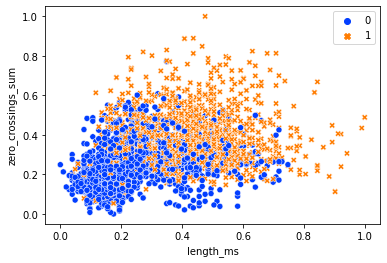

In [81]:
kmeans = KMeans(n_clusters=2, n_init=100, max_iter=100)
kmeans.fit(num_data_norm_df)

kmeans.labels_

sns.scatterplot(data=num_data_norm_df, x="length_ms", y="zero_crossings_sum", hue=kmeans.labels_, style=kmeans.labels_, palette="bright")



<AxesSubplot:xlabel='length_ms', ylabel='zero_crossings_sum'>

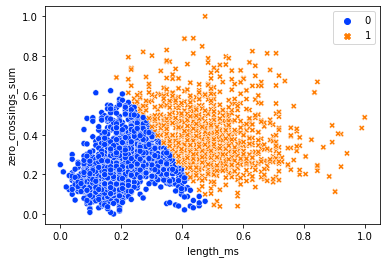

In [82]:
kmeans = KMeans(n_clusters=2, n_init=100, max_iter=100)
kmeans.fit(num_data_norm_df[["length_ms", "zero_crossings_sum"]])

kmeans.labels_

sns.scatterplot(data=num_data_norm_df[["length_ms", "zero_crossings_sum"]], x="length_ms", y="zero_crossings_sum",hue=kmeans.labels_, style=kmeans.labels_, palette="bright")



In [83]:
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [84]:
%%time
sse_list = []
for k in range(2, 51):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(num_data_norm_df)
    sse_list.append(kmeans.inertia_)

CPU times: user 1min, sys: 4.69 s, total: 1min 5s
Wall time: 20.1 s


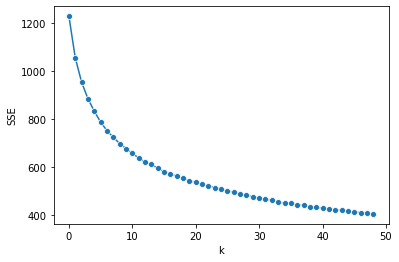

In [85]:
sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

In [116]:
"""kmeans = KMeans(n_clusters=8, n_init=10, max_iter=100)
for i in num_data_speech_norm_df.columns:
    for j in num_data_speech_norm_df.columns:
        kmeans.fit(num_data_speech_norm_df[[i, j]])
        sns.scatterplot(data=num_data_speech_norm_df, x=i, y=j, hue=kmeans.labels_, style=kmeans.labels_, palette="bright")
        plt.show()"""

"""for i in num_data_neu_norm_df.columns:
    for j in num_data_neu_norm_df.columns:
        if  i!=j:
            kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
            kmeans.fit(num_data_neu_norm_df[[i,j]])
            sns.scatterplot(data=num_data_neu_norm_df, x=i, y=j, hue=kmeans.labels_, style=kmeans.labels_, palette="bright")
            plt.show()"""

'kmeans = KMeans(n_clusters=8, n_init=10, max_iter=100)\nfor i in num_data_speech_norm_df.columns:\n    for j in num_data_speech_norm_df.columns:\n        kmeans.fit(num_data_speech_norm_df[[i, j]])\n        sns.scatterplot(data=num_data_speech_norm_df, x=i, y=j, hue=kmeans.labels_, style=kmeans.labels_, palette="bright")\n        plt.show()'

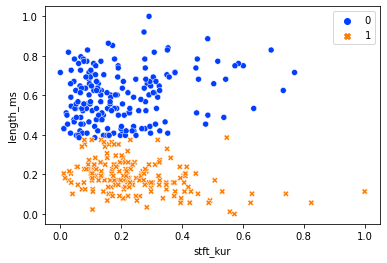

In [119]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=100)
kmeans.fit(num_data_sad_norm_df[["stft_kur","length_ms"]])
sns.scatterplot(data=num_data_sad_norm_df[["stft_kur","length_ms"]], x="stft_kur", y="length_ms", hue=kmeans.labels_, style=kmeans.labels_, palette="bright")
plt.show()

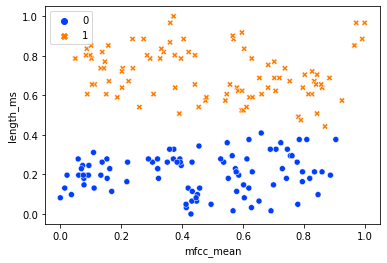

In [120]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=100)
kmeans.fit(num_data_neu_norm_df[["mfcc_mean", "length_ms"]])
sns.scatterplot(data=num_data_neu_norm_df, x="mfcc_mean", y="length_ms", hue=kmeans.labels_, style=kmeans.labels_, palette="bright")
plt.show()

## The plot above tells us that K-means is not the right method to implement on this dataset, since we can't locate any k where the derivative of the function has a significant change in its slope. 

HIERARCHICAL CLUSTERING

In [86]:
from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [87]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# The following code was executed just to tune the different parameters in hierarchical clustering
Only the most interesting results, in terms of silhouette score/separation of clusters were considered

In [88]:
singleintstd = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='single')
singleintstd = singleintstd.fit(num_data_norm_df[["intensity", "std"]])

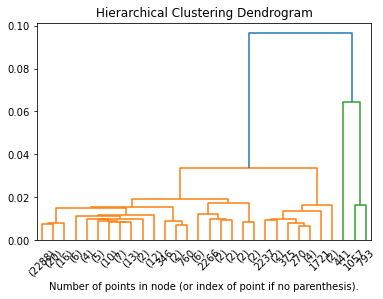

In [89]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(singleintstd, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [90]:
wardintzcs = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='ward')
wardintzcs = wardintzcs.fit(num_data_norm_df[["intensity", "zero_crossings_sum"]])

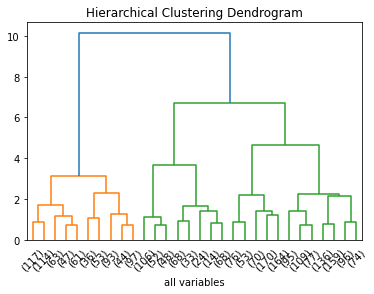

In [91]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(wardintzcs, truncate_mode="lastp")
plt.xlabel("all variables")
plt.show()

In [92]:
singlewholedataset = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='single')
singlewholedataset = singlewholedataset.fit(num_data_norm_df)

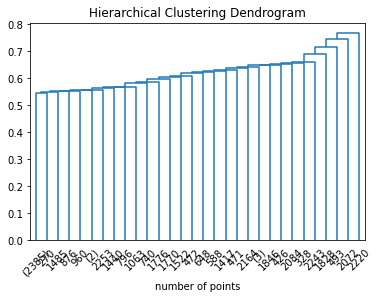

In [93]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(singlewholedataset, truncate_mode="lastp")
plt.xlabel("number of points")
plt.show()

In [94]:
wardwholedataset = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='ward')
wardwholedataset = wardwholedataset.fit(num_data_norm_df)

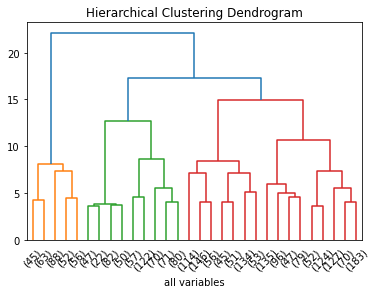

In [95]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(wardwholedataset, truncate_mode="lastp")
plt.xlabel("all variables")
plt.show()

In [96]:
completewholedataset = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='complete')
completewholedataset = completewholedataset.fit(num_data_norm_df)

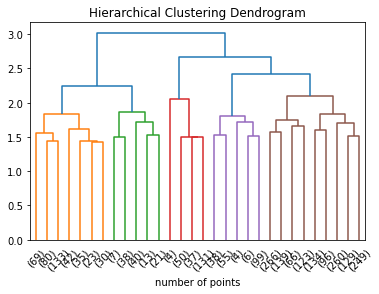

In [97]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(completewholedataset, truncate_mode="lastp")
plt.xlabel("number of points")
plt.show()

In [98]:
import sklearn

print('single linkage')
single_linkage = AgglomerativeClustering(n_clusters=2, linkage='single', affinity='euclidean')
single_linkage.fit(num_data_norm_df)
hist, bins = np.histogram(single_linkage.labels_, 
                          bins=range(0, len(set(single_linkage.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', sklearn.metrics.silhouette_score(num_data_norm_df, single_linkage.labels_))

single linkage
labels {0: 2416, 1: 1}
silhouette 0.44174348649326445


In [99]:
print('ward')
ward_linkage = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
ward_linkage.fit(num_data_norm_df)
hist, bins = np.histogram(ward_linkage.labels_, 
                          bins=range(0, len(set(ward_linkage.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', sklearn.metrics.silhouette_score(num_data_norm_df, ward_linkage.labels_))

ward
labels {0: 1512, 1: 304, 2: 601}
silhouette 0.12370632615892121


In [100]:
print('complete')
complete_linkage = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean')
complete_linkage.fit(num_data_norm_df)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', sklearn.metrics.silhouette_score(num_data_norm_df, complete_linkage.labels_))

complete
labels {0: 1462, 1: 119, 2: 222, 3: 202, 4: 412}
silhouette 0.06149903590253767


In [101]:
print('single linkage between int and std')
singlelinkageint = AgglomerativeClustering(n_clusters=2, linkage='single', affinity='euclidean')
singlelinkageint.fit(num_data_norm_df)
hist, bins = np.histogram(singlelinkageint.labels_, 
                          bins=range(0, len(set(singlelinkageint.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', sklearn.metrics.silhouette_score(num_data_norm_df[["intensity", "std"]], singlelinkageint.labels_))

single linkage between int and std
labels {0: 2416, 1: 1}
silhouette -0.3910598859712812


In [102]:
print('ward linkage between int and zcs')
wardlinkageint = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
wardlinkageint.fit(num_data_norm_df)
hist, bins = np.histogram(wardlinkageint.labels_, 
                          bins=range(0, len(set(wardlinkageint.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', sklearn.metrics.silhouette_score(num_data_norm_df[["intensity", "zero_crossings_sum"]], wardlinkageint.labels_))

ward linkage between int and zcs
labels {0: 2113, 1: 304}
silhouette 0.29626199015253507


In [103]:
print('dbscan')

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
dbscan.fit(num_data_norm_df[["zero_crossings_sum", "std"]])

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print('labels', dict(zip(bins, hist)))
print('silhouette', sklearn.metrics.silhouette_score(num_data_norm_df[["length_ms", "std"]], dbscan.labels_))

dbscan
labels {-1: 2, 0: 2415, 1: 0}
silhouette 0.676333653388437


I tried to implement different models for hierarchical clustering by using different methods to compute the euclidean distance between points. 
We know from the theory that single link is good for non-elliptical shapes, such as the one we have noticed while studying the correlation between intensity and std. However, single link on this couple of attributes gives a bad result in terms of silhouette score: this probably happens because there is only one single cluster in the scatterplot comparing these two variables. in fact all the points are in the same cluster except for one. So, as in kmeans, clustering is pointless in this case.
As for models involving the whole dataset, single linkage is the one providing the highest silhouette score anyway, but again all the points are put in the same cluster except for one, so probably a bad choice. I thought that complete linkage would be better because it is more robust to noise but clearly this is not enough when dealing with such sparse clusters like those we have for this dataset, since its silhouette score is very close to 0. 
Ward's dendograms are those which look the most promising and this is confirmed when observing the related silhouette score. 

In [118]:
#loop over each possible couple of variables in the partition of the original dataset belonging to the "neutral" emotion

"""for i in num_data_neu_norm_df.columns:
    for j in num_data_neu_norm_df.columns:
        if  i!=j:
            wardintzcs = AgglomerativeClustering(distance_threshold=None, n_clusters=2, affinity='euclidean', linkage='ward')
            wardintzcs = wardintzcs.fit(num_data_neu_norm_df[[i, j]])

            plt.title("Hierarchical Clustering Dendrogram")
            sns.scatterplot(data=num_data_neu_norm_df[[i,j]], x=i, y=j, hue=wardintzcs.labels_, style=wardintzcs.labels_, palette="bright")
            plt.show()"""

'for i in num_data_neu_norm_df.columns:\n    for j in num_data_neu_norm_df.columns:\n        if  i!=j:\n            wardintzcs = AgglomerativeClustering(distance_threshold=None, n_clusters=2, affinity=\'euclidean\', linkage=\'ward\')\n            wardintzcs = wardintzcs.fit(num_data_neu_norm_df[[i, j]])\n\n            plt.title("Hierarchical Clustering Dendrogram")\n            sns.scatterplot(data=num_data_neu_norm_df[[i,j]], x=i, y=j, hue=wardintzcs.labels_, style=wardintzcs.labels_, palette="bright")\n            plt.show()'

DBSCAN

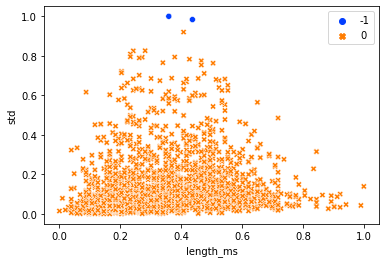

In [105]:
sns.scatterplot(data=num_data_norm_df, x="length_ms", y="std", hue=dbscan.labels_, 
                style=dbscan.labels_, palette="bright")
plt.show()

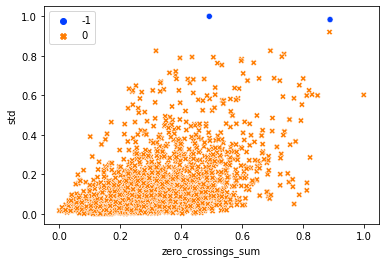

In [106]:
sns.scatterplot(data=num_data_norm_df, x="zero_crossings_sum", y="std", hue=dbscan.labels_, 
                style=dbscan.labels_, palette="bright")
plt.show()

In [111]:
#dbscan = DBSCAN(eps=0.12, min_samples=35, metric='euclidean')
#dbscan.fit(num_data_fea_norm_df[["sc_std", "mfcc_max"]])
#sns.scatterplot(data=num_data_fea_norm_df[["sc_std", "mfcc_max"]], x="sc_std", y="mfcc_max", hue=dbscan.labels_, style=dbscan.labels_, palette="bright")
#plt.show()

In [112]:
#for i in num_data_norm_df.columns:
#    dist = pdist(num_data_norm_df[["std", i ]], 'euclidean')
#    dist = squareform(dist)

#    k=3
#    kth_distances = []
#    for d in dist:  # d is a vector containing distances between the ith record and all the others
#        index_kth_distance = np.argsort(d)[k]  
#        kth_distances.append(d[index_kth_distance])

#    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
#    plt.ylabel('distance from the {}th neighbor'.format(k))
#    plt.xlabel(i)     
#    plt.show()    

In [113]:
#for i in num_data_norm_df.columns:
#    for j in num_data_norm_df.columns:
#        sns.scatterplot(data=num_data_norm_df, x=i, y=j)
#        sns.set(rc={'figure.figsize':(5,5)})
#        plt.show()

In [114]:
#for i in num_data_norm_df.columns:
#for j in num_data_norm_df.columns:
#    dbscan = DBSCAN(eps=0.025, min_samples=25, metric='euclidean')
#    dbscan.fit(num_data_norm_df[["std", j]])
#         
#    sns.scatterplot(data=num_data_norm_df, x="std", y=j, hue=dbscan.labels_, 
#            style=dbscan.labels_, palette="bright")
#    plt.show()

In [115]:
"""for i in num_data_speech_norm_df.columns:
    for j in num_data_speech_norm_df.columns:
        dbscan = DBSCAN(eps=0.01, min_samples=3, metric='euclidean')
        dbscan.fit(num_data_speech_norm_df[[i, j]])
         
        if sklearn.metrics.silhouette_score(num_data_speech_norm_df[[i, j]], dbscan.labels_) > 0.5 and i!=j:
            print('silhouette', sklearn.metrics.silhouette_score(num_data_speech_norm_df[[i, j]], dbscan.labels_), i, j)
            sns.scatterplot(data=num_data_speech_norm_df, x=i, y=j, hue=dbscan.labels_,style=dbscan.labels_, palette="bright")
            plt.show()"""

'for i in num_data_speech_norm_df.columns:\n    for j in num_data_speech_norm_df.columns:\n        dbscan = DBSCAN(eps=0.01, min_samples=3, metric=\'euclidean\')\n        dbscan.fit(num_data_speech_norm_df[[i, j]])\n         \n        if sklearn.metrics.silhouette_score(num_data_speech_norm_df[[i, j]], dbscan.labels_) > 0.5 and i!=j:\n            print(\'silhouette\', sklearn.metrics.silhouette_score(num_data_speech_norm_df[[i, j]], dbscan.labels_), i, j)\n            sns.scatterplot(data=num_data_speech_norm_df, x=i, y=j, hue=dbscan.labels_,style=dbscan.labels_, palette="bright")\n            plt.show()'

### CLASSIFICATION

In [122]:
!pip install scikit-plot
from scipy.stats import uniform, randint, loguniform

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.datasets import load_breast_cancer

DECISION TREES

The algorithm was implemented by tuning some parameters: for criterion, both gini and entropy were implemented, but the entropy lead to overfitting on the training set. Indeed the accuracy from entropy was too large. 
We then used only gini for all the attempts.
For the ccp_alpha parameter, we used values between 0 and 0.003 with a jump of 0.0002 each time: the best accuracy is given for a low level of alpha but this leads the complexity of the tree to be too high to be readable.

In [126]:
#loop to tune hyperparameters

"""kvalues = [2, 4, 6, 8, 10, 12, 16, 18, 20, 22, 24, 26, 28, 100]
#np.arange(0, 0.003, 0.0002)


listofcriterion=["gini"]


for j in listofcriterion:
    for k in kvalues:
        dt = DecisionTreeClassifier( criterion=j, max_depth=k)

        dt.fit(X_train, y_train)
        y_test_pred = dt.predict(X_test)    
        y_train_pred = dt.predict(X_train)
        evaluation=accuracy_score(y_test, y_test_pred)
            
        if evaluation>0.2:
            cf = confusion_matrix(y_test, y_test_pred)
            plt.figure(figsize=(40, 8), dpi=300)
            sns.heatmap(cf, annot=True, cmap="Greens")
            plt.xlabel("True")
            plt.ylabel("Predicted")
            plt.show()
            print(j,k, evaluation)"""

'kvalues = [2, 4, 6, 8, 10, 12, 16, 18, 20, 22, 24, 26, 28, 100]\n#np.arange(0, 0.003, 0.0002)\n\n\nlistofcriterion=["gini"]\n\n\nfor j in listofcriterion:\n    for k in kvalues:\n        dt = DecisionTreeClassifier( criterion=j, max_depth=k)\n\n        dt.fit(X_train, y_train)\n        y_test_pred = dt.predict(X_test)    \n        y_train_pred = dt.predict(X_train)\n        evaluation=accuracy_score(y_test, y_test_pred)\n            \n        if evaluation>0.2:\n            cf = confusion_matrix(y_test, y_test_pred)\n            plt.figure(figsize=(40, 8), dpi=300)\n            sns.heatmap(cf, annot=True, cmap="Greens")\n            plt.xlabel("True")\n            plt.ylabel("Predicted")\n            plt.show()\n            print(j,k, evaluation)'

In [127]:
"""y_train_pred = dt.predict(X_train)
print(accuracy_score(y_train, y_train_pred))"""

'y_train_pred = dt.predict(X_train)\nprint(accuracy_score(y_train, y_train_pred))'

In [128]:
"""y_test_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred, average="macro"))"""

'y_test_pred = dt.predict(X_test)\nprint(accuracy_score(y_test, y_test_pred))\nprint(f1_score(y_test, y_test_pred, average="macro"))'

In [129]:
#print(classification_report(y_test, y_test_pred))

In [130]:
"""cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()"""

'cf = confusion_matrix(y_test, y_test_pred)\nsns.heatmap(cf, annot=True, cmap="Greens")\nplt.xlabel("True")\nplt.ylabel("Predicted")\nplt.show()'

In [131]:
"""y_test_pred_proba = dt.predict_proba(X_test)

plot_roc(y_test, dt.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))"""

'y_test_pred_proba = dt.predict_proba(X_test)\n\nplot_roc(y_test, dt.predict_proba(X_test))\nplt.show()\nprint(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))'

In [132]:
#plot_precision_recall(y_test, dt.predict_proba(X_test))
#plt.show()

In [133]:
#list_alpha=np.arange(0,0.0022,0.0002).tolist()

Now let's plot the max_depth parameter vs the accuracy score. The same was for the ccp_alpha parameter with respect to the accuracy score.

In [136]:
list_depth=[2, 4, 6, 8, 10, 12, 16, 18, 20, 22, 24, 26, 28, 100]

In [137]:
list_acc=[0.257,0.327,0.394,0.379,0.372,0.360,0.358,0.367,0.362,0.373,0.377,0.365,0.381,0.373]

In [138]:
"""plt.figure(figsize=(15, 15),)
sns.lineplot(x=list_depth, y=list_acc,marker='o' )
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()"""

'plt.figure(figsize=(15, 15),)\nsns.lineplot(x=list_depth, y=list_acc,marker=\'o\' )\nplt.xlabel("max_depth")\nplt.ylabel("accuracy")\nplt.show()'

NAIVE BAYES

In [139]:
clf = GaussianNB()

In [140]:
clf.fit(X_train, y_train)

GaussianNB()

In [141]:
y_pred = clf.predict(X_test)

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.61      0.54      0.57       110
        calm       0.67      0.20      0.31       110
     disgust       0.27      0.38      0.32        58
     fearful       0.52      0.20      0.29       112
       happy       0.34      0.30      0.32       111
     neutral       0.21      0.73      0.33        56
         sad       0.27      0.11      0.15       112
   surprised       0.29      0.70      0.41        57

    accuracy                           0.35       726
   macro avg       0.40      0.39      0.34       726
weighted avg       0.43      0.35      0.33       726



In [143]:
clf.predict_proba(X_test)

array([[3.96239143e-01, 4.08736366e-05, 1.26211062e-12, ...,
        4.32091286e-38, 3.65771468e-03, 2.41041463e-18],
       [7.50248227e-07, 7.23121293e-05, 1.27068570e-01, ...,
        1.25537522e-35, 3.47138616e-04, 8.72444778e-01],
       [9.87390865e-01, 1.77572550e-20, 1.47155302e-18, ...,
        2.04097675e-58, 2.50478571e-16, 3.79864185e-21],
       ...,
       [1.12588649e-02, 1.04152122e-04, 3.38758028e-01, ...,
        3.60609524e-37, 2.12953357e-03, 5.31854471e-01],
       [2.39164151e-03, 2.49866739e-06, 8.66710277e-01, ...,
        1.83793349e-03, 6.52163569e-04, 1.28062264e-01],
       [1.42252643e-09, 3.29258332e-03, 1.63761069e-01, ...,
        2.66935351e-34, 2.71643640e-03, 8.30213282e-01]])

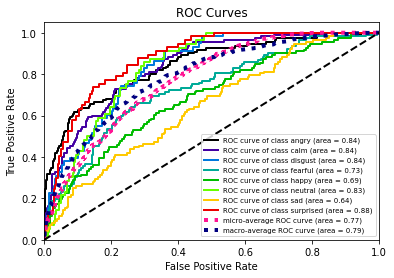

0.7859423534874813


In [144]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.legend(prop={"size":7})
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

KNN

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [146]:
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [147]:
clf = KNeighborsClassifier(n_neighbors=40, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=40)

In [148]:
clf.score(X_test_norm, y_test)

0.34573002754820936

The following lines of code were implemented to run the grid search on the hyperparameters of the KNN algorithm. Then, the results were stored so that plots comparing different performances for each set of hyperparameters could be shown

In [149]:
"""i = 1
list_x = []
list_y = []
for i in range(X_train.shape[0]//10):
    clf = KNeighborsClassifier(n_neighbors=i+1, metric="euclidean", weights="uniform")
    clf.fit(X_train_norm, y_train)
    list_x.append(i+1)
    list_y.append(clf.score(X_test_norm, y_test))
plt.figure(figsize=(15, 15),)
sns.lineplot(x=list_x, y=list_y,marker='o' )
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()"""

'i = 1\nlist_x = []\nlist_y = []\nfor i in range(X_train.shape[0]//10):\n    clf = KNeighborsClassifier(n_neighbors=i+1, metric="euclidean", weights="uniform")\n    clf.fit(X_train_norm, y_train)\n    list_x.append(i+1)\n    list_y.append(clf.score(X_test_norm, y_test))\nplt.figure(figsize=(15, 15),)\nsns.lineplot(x=list_x, y=list_y,marker=\'o\' )\nplt.xlabel("k value")\nplt.ylabel("accuracy")\nplt.show()'

In [150]:
"""i = 1
list_x_eu = []
list_y_eu = []
list_x_ed = []
list_y_ed = []
list_x_cu = []
list_y_cu = []
list_x_cd = []
list_y_cd = []
for i in range(X_train.shape[0]//2):
    clf_eu = KNeighborsClassifier(n_neighbors=i+1, metric="euclidean", weights="uniform")
    clf_eu.fit(X_train_norm, y_train)
    list_x_eu.append(i+1)
    list_y_eu.append(clf_eu.score(X_test_norm, y_test))
    clf_ed = KNeighborsClassifier(n_neighbors=i+1, metric="euclidean", weights="distance")
    clf_ed.fit(X_train_norm, y_train)
    list_x_ed.append(i+1)
    list_y_ed.append(clf_ed.score(X_test_norm, y_test))
    clf_cu = KNeighborsClassifier(n_neighbors=i+1, metric="cityblock", weights="uniform")
    clf_cu.fit(X_train_norm, y_train)
    list_x_cu.append(i+1)
    list_y_cu.append(clf_cu.score(X_test_norm, y_test))
    clf_cd = KNeighborsClassifier(n_neighbors=i+1, metric="cityblock", weights="distance")
    clf_cd.fit(X_train_norm, y_train)
    list_x_cd.append(i+1)
    list_y_cd.append(clf_cd.score(X_test_norm, y_test))
plt.figure(figsize=(15, 15),)
sns.lineplot(x=list_x_eu, y=list_y_eu,marker='o' )
sns.lineplot(x=list_x_ed, y=list_y_ed,marker='o' )
sns.lineplot(x=list_x_cu, y=list_y_cu,marker='o' )
sns.lineplot(x=list_x_cd, y=list_y_cd,marker='o' )
plt.legend(labels=['Euclidean Uniform', 'Euclidean Distance', 'Cityblock Uniform', 'Cityblock Uniform'])
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()"""

'i = 1\nlist_x_eu = []\nlist_y_eu = []\nlist_x_ed = []\nlist_y_ed = []\nlist_x_cu = []\nlist_y_cu = []\nlist_x_cd = []\nlist_y_cd = []\nfor i in range(X_train.shape[0]//2):\n    clf_eu = KNeighborsClassifier(n_neighbors=i+1, metric="euclidean", weights="uniform")\n    clf_eu.fit(X_train_norm, y_train)\n    list_x_eu.append(i+1)\n    list_y_eu.append(clf_eu.score(X_test_norm, y_test))\n    clf_ed = KNeighborsClassifier(n_neighbors=i+1, metric="euclidean", weights="distance")\n    clf_ed.fit(X_train_norm, y_train)\n    list_x_ed.append(i+1)\n    list_y_ed.append(clf_ed.score(X_test_norm, y_test))\n    clf_cu = KNeighborsClassifier(n_neighbors=i+1, metric="cityblock", weights="uniform")\n    clf_cu.fit(X_train_norm, y_train)\n    list_x_cu.append(i+1)\n    list_y_cu.append(clf_cu.score(X_test_norm, y_test))\n    clf_cd = KNeighborsClassifier(n_neighbors=i+1, metric="cityblock", weights="distance")\n    clf_cd.fit(X_train_norm, y_train)\n    list_x_cd.append(i+1)\n    list_y_cd.append(clf_

In [151]:
"""plt.figure(figsize=(15, 15),)
sns.lineplot(x=list_x_eu, y=list_y_eu,marker='o' )
sns.lineplot(x=list_x_ed, y=list_y_ed,marker='o' )
sns.lineplot(x=list_x_cu, y=list_y_cu,marker='o' )
sns.lineplot(x=list_x_cd, y=list_y_cd,marker='o' )
plt.legend(labels=['Euclidean Uniform', 'Euclidean Distance', 'Cityblock Uniform', 'Cityblock Distance'])
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()"""

'plt.figure(figsize=(15, 15),)\nsns.lineplot(x=list_x_eu, y=list_y_eu,marker=\'o\' )\nsns.lineplot(x=list_x_ed, y=list_y_ed,marker=\'o\' )\nsns.lineplot(x=list_x_cu, y=list_y_cu,marker=\'o\' )\nsns.lineplot(x=list_x_cd, y=list_y_cd,marker=\'o\' )\nplt.legend(labels=[\'Euclidean Uniform\', \'Euclidean Distance\', \'Cityblock Uniform\', \'Cityblock Distance\'])\nplt.xlabel("k value")\nplt.ylabel("accuracy")\nplt.show()'

In [152]:
"""%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=4,
    refit=True,
)
grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_"""

'%%time\nparam_grid = {\n    "n_neighbors": np.arange(1, X_train.shape[0]//2),\n    "weights": ["uniform", "distance"],\n    "metric": ["euclidean", "cityblock"],\n}\n\ngrid = GridSearchCV(\n    KNeighborsClassifier(),\n    param_grid=param_grid,\n    cv=RepeatedStratifiedKFold(random_state=0),\n    n_jobs=4,\n    refit=True,\n)\ngrid.fit(X_train_norm, y_train)\nclf = grid.best_estimator_'

In [153]:
"""print(grid.best_params_, grid.best_score_)"""

'print(grid.best_params_, grid.best_score_)'

In [154]:
"""clf.score(X_test_norm, y_test)"""

'clf.score(X_test_norm, y_test)'

In [155]:
"""grid.cv_results_"""

'grid.cv_results_'

In [156]:
"""results = pd.DataFrame(grid.cv_results_)
results"""

'results = pd.DataFrame(grid.cv_results_)\nresults'

In [157]:
"""results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]"""

'results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]'

In [158]:
"""sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)"""

'sns.lineplot(\n    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"\n)'